# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 34

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,5.000000,24,24.803453,4.8,4.960691,6.986341,4.695889,2.288196
560,Kelleher,Liverpool,45,2.000000,10,8.394995,5.0,4.197497,NaN,4.482488,1.978719
12,Martínez,Aston Villa,54,33.200000,166,144.663900,5.0,4.357346,3.443922,4.380230,1.875103
597,Sánchez,Brighton,46,22.857143,96,90.435480,4.2,3.956552,4.275553,3.830988,1.844752
417,Johnstone,West Brom,46,32.750000,131,129.283952,4.0,3.947602,6.529698,3.785879,1.840579
213,Meslier,Leeds United,47,32.954545,145,129.523080,4.4,3.930356,3.951356,4.198113,1.812938
326,Dubravka,Newcastle Utd,48,9.117647,31,35.707225,3.4,3.916276,3.487334,3.912393,1.787527
548,Mendy,Chelsea,52,28.222222,127,112.690602,4.5,3.992974,3.895168,3.728173,1.751035
245,Adrián,Liverpool,42,2.972973,11,10.560127,3.7,3.552043,NaN,3.837033,1.733219


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.704084,7.0,5.176021,NaN,5.073312,2.467571
277,Cancelo,Manchester City,59,24.807692,129,132.131126,5.2,5.326216,4.480294,5.194561,2.192768
273,Stones,Manchester City,51,20.166667,121,96.380751,6.0,4.779211,2.481636,4.694907,2.116270
75,Bernardo,Brighton,39,2.941176,5,11.831036,1.7,4.022552,NaN,3.750214,2.036899
109,Rüdiger,Chelsea,47,15.882353,81,68.263910,5.1,4.298098,6.047515,4.001106,1.982565
123,James,Chelsea,51,27.631579,105,121.483407,3.8,4.396542,3.164251,4.039227,1.946822
232,Chilwell,Chelsea,59,23.846154,124,111.073609,5.2,4.657926,6.937463,4.287874,1.917638
274,Mendy,Manchester City,59,10.909091,60,49.569047,5.5,4.543829,7.639817,4.509683,1.870665
104,Alonso,Chelsea,57,11.951220,49,52.919982,4.1,4.427998,2.751624,4.019304,1.854684


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,56,24.827586,144,130.231683,5.8,5.245443,1.924406,4.954108,2.216604
301,Lingard,West Ham,67,11.923077,93,64.606592,7.8,5.418617,5.666938,5.543920,2.093395
570,Raphinha,Leeds United,54,26.136364,115,115.045925,4.4,4.401757,5.047994,4.667960,1.894215
24,Saka,Arsenal,51,27.837838,103,117.996134,3.7,4.238696,3.608740,4.217644,1.876926
37,Grealish,Aston Villa,75,21.864407,129,111.239318,5.9,5.087690,NaN,4.934308,1.857762
302,Fernandes,Manchester Utd,115,32.985075,221,206.403235,6.7,6.257474,4.589478,6.144870,1.845228
272,De Bruyne,Manchester City,119,24.150943,128,152.754589,5.3,6.324995,5.570320,5.908734,1.833524
105,Jorginho,Chelsea,47,24.047619,101,95.100268,4.2,3.954665,2.437734,3.682561,1.824151
390,Son,Tottenham,96,32.968750,211,178.809692,6.4,5.423612,5.192899,5.449817,1.750463


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
437,Antonio,West Ham,64,21.914894,103,103.787909,4.7,4.735953,5.350000,4.811671,1.872050
388,Kane,Tottenham,119,30.985915,220,198.788564,7.1,6.415449,7.025000,6.465510,1.859746
202,Bamford,Leeds United,64,33.877551,166,158.795819,4.9,4.687346,2.602090,4.916040,1.852836
514,Watkins,Aston Villa,65,33.260870,153,150.860655,4.6,4.535680,5.620945,4.379173,1.779040
164,Calvert-Lewin,Everton,75,27.924528,148,132.665491,5.3,4.750859,4.733333,4.614471,1.734768
506,Wilson,Newcastle Utd,65,25.208333,121,110.545491,4.8,4.385276,1.750000,4.277333,1.720047
91,Wood,Burnley,64,29.302326,126,127.372746,4.3,4.346848,7.042139,4.558754,1.718242
224,Vardy,Leicester City,103,30.000000,165,164.748564,5.5,5.491619,3.842362,5.166125,1.711125
665,Maja,Fulham,52,11.935484,37,46.320000,3.1,3.880865,3.500000,3.945518,1.701872


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,119,30.985915,220,198.788564,7.1,6.415449,6.465510,1.859746
272,De Bruyne,Manchester City,119,24.150943,128,152.754589,5.3,6.324995,5.908734,1.833524
302,Fernandes,Manchester Utd,115,32.985075,221,206.403235,6.7,6.257474,6.144870,1.845228
254,Salah,Liverpool,127,32.096774,199,189.139277,6.2,5.892781,6.229657,1.653554
224,Vardy,Leicester City,103,30.000000,165,164.748564,5.5,5.491619,5.166125,1.711125
390,Son,Tottenham,96,32.968750,211,178.809692,6.4,5.423612,5.449817,1.750463
301,Lingard,West Ham,67,11.923077,93,64.606592,7.8,5.418617,5.543920,2.093395
277,Cancelo,Manchester City,59,24.807692,129,132.131126,5.2,5.326216,5.194561,2.192768
271,Gündogan,Manchester City,56,24.827586,144,130.231683,5.8,5.245443,4.954108,2.216604


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.176021,NaN,5.177539,5.073312,2.467571
112,Arrizabalaga,Chelsea,47,5.000000,4.8,4.960691,6.986341,4.580004,4.695889,2.288196
271,Gündogan,Manchester City,56,24.827586,5.8,5.245443,1.924406,4.475231,4.954108,2.216604
277,Cancelo,Manchester City,59,24.807692,5.2,5.326216,4.480294,4.780847,5.194561,2.192768
273,Stones,Manchester City,51,20.166667,6.0,4.779211,2.481636,4.349988,4.694907,2.116270
301,Lingard,West Ham,67,11.923077,7.8,5.418617,5.666938,5.678753,5.543920,2.093395
75,Bernardo,Brighton,39,2.941176,1.7,4.022552,NaN,4.100215,3.750214,2.036899
109,Rüdiger,Chelsea,47,15.882353,5.1,4.298098,6.047515,3.862703,4.001106,1.982565
560,Kelleher,Liverpool,45,2.000000,5.0,4.197497,NaN,4.157854,4.482488,1.978719


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,5.000000,24,24.803453,4.8,4.960691,6.986341,4.695889,2.288196
233,Iheanacho,Leicester City,63,21.136364,93,81.975164,4.4,3.878395,6.663388,3.686930,1.545189
388,Kane,Tottenham,119,30.985915,220,198.788564,7.1,6.415449,6.631991,6.465510,1.859746
91,Wood,Burnley,64,29.302326,126,127.372746,4.3,4.346848,6.001188,4.558754,1.718242
573,Olsen,Everton,45,6.944444,25,24.146771,3.6,3.477135,6.001046,3.432928,1.639137
275,Mahrez,Manchester City,80,24.814815,134,120.818431,5.4,4.868802,5.979541,4.630973,1.721382
259,Alexander-Arnold,Liverpool,76,30.975610,127,143.281117,4.1,4.625611,5.964173,4.996208,1.677885
274,Mendy,Manchester City,59,10.909091,60,49.569047,5.5,4.543829,5.776545,4.509683,1.870665
245,Adrián,Liverpool,42,2.972973,11,10.560127,3.7,3.552043,5.730734,3.837033,1.733219


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,119,30.985915,220,198.788564,7.1,6.415449,6.970969,1.859746
302,Fernandes,Manchester Utd,115,32.985075,221,206.403235,6.7,6.257474,6.089372,1.845228
390,Son,Tottenham,96,32.968750,211,178.809692,6.4,5.423612,5.779602,1.750463
254,Salah,Liverpool,127,32.096774,199,189.139277,6.2,5.892781,5.770100,1.653554
301,Lingard,West Ham,67,11.923077,93,64.606592,7.8,5.418617,5.678753,2.093395
224,Vardy,Leicester City,103,30.000000,165,164.748564,5.5,5.491619,5.413773,1.711125
272,De Bruyne,Manchester City,119,24.150943,128,152.754589,5.3,6.324995,5.248357,1.833524
39,Hause,Aston Villa,44,4.000000,28,20.704084,7.0,5.176021,5.177539,2.467571
251,Mané,Liverpool,117,29.782609,137,155.814385,4.6,5.231724,5.123384,1.529508


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,119,30.985915,7.1,6.415449,6.970969,1.859746,18.3,6.8,25.1,0.810045
224,Vardy,Leicester City,103,30.000000,5.5,5.491619,5.413773,1.711125,17.4,4.8,22.2,0.740000
254,Salah,Liverpool,127,32.096774,6.2,5.892781,5.770100,1.653554,17.3,4.6,21.9,0.682312
202,Bamford,Leeds United,64,33.877551,4.9,4.687346,4.683649,1.852836,15.1,3.7,18.8,0.554940
514,Watkins,Aston Villa,65,33.260870,4.6,4.535680,4.538700,1.779040,14.6,3.4,18.0,0.541176
302,Fernandes,Manchester Utd,115,32.985075,6.7,6.257474,6.089372,1.845228,13.8,10.6,24.4,0.739729
164,Calvert-Lewin,Everton,75,27.924528,5.3,4.750859,4.587481,1.734768,13.6,1.2,14.8,0.530000
251,Mané,Liverpool,117,29.782609,4.6,5.231724,5.123384,1.529508,13.2,4.3,17.5,0.587591
68,Maupay,Brighton,60,32.121212,3.3,4.035812,3.708170,1.647613,12.8,3.6,16.4,0.510566


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week34,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,...,xG_week28,xG_week29,xG_week3,xG_week30,xG_week31,xG_week32,xG_week33,xG_week34,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 34,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,88.88092,3.371345,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,8,456,100.0,100.0,32.903339,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.3,-0.1,NaN,5.274923,1.8,3.426123,4.226279,3.931484,0.797316,2.443213,6.797316,7.248999,4.671518,4.963273,2.598274,4.404777,4.986388,1.986388,3.090127,1.0,2.489826,NaN,NaN,NaN,NaN,1.199148,1.443213,6.68128,3.626279,3.797316,NaN,NaN,NaN,NaN,3.963273,3.461196,1.72834,2


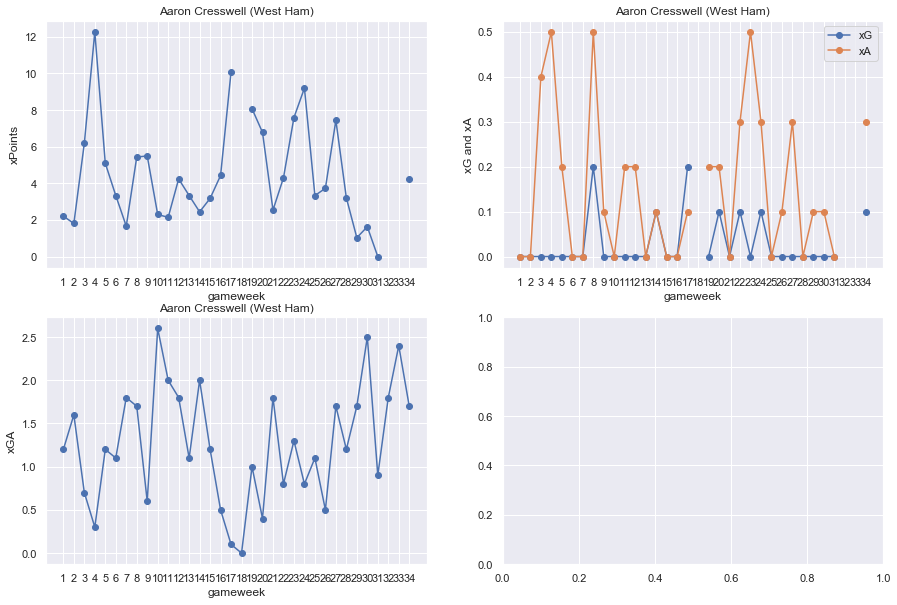

In [14]:
# find player index
name_string = 'Holding'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Ihean'),'web_name']

id
233    Iheanacho
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,16,259,390,302,254,301,388,202,233] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 61.04152414593172
Expected points next gameweek: 61.96777696723394


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,33.200000,5.0,4.357346,3.443922,3.517170,4.356441,4.380230,1.875103
109,Rüdiger,Chelsea,47,15.882353,5.1,4.298098,6.047515,4.711590,3.862703,4.001106,1.982565
16,Holding,Arsenal,43,26.363636,3.3,3.371345,3.887022,3.607583,3.422991,3.534003,1.625807
259,Alexander-Arnold,Liverpool,76,30.975610,4.1,4.625611,7.789247,5.964173,4.549623,4.996208,1.677885
390,Son,Tottenham,96,32.968750,6.4,5.423612,5.192899,5.315559,5.779602,5.449817,1.750463
302,Fernandes,Manchester Utd,115,32.985075,6.7,6.257474,4.589478,5.314456,6.089372,6.144870,1.845228
254,Salah,Liverpool,127,32.096774,6.2,5.892781,6.877473,5.481952,5.770100,6.229657,1.653554
301,Lingard,West Ham,67,11.923077,7.8,5.418617,5.666938,5.686070,5.678753,5.543920,2.093395
388,Kane,Tottenham,119,30.985915,7.1,6.415449,7.025000,6.631991,6.970969,6.465510,1.859746



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,46,22.857143,4.2,3.956552,4.275553,4.227029,4.177155,3.830988,1.844752
558,Coufal,West Ham,47,30.270270,3.7,3.786030,3.843319,3.444045,4.046205,4.016010,1.746365
23,Smith Rowe,Arsenal,42,16.129032,3.1,3.212865,3.277949,2.208747,3.215382,3.223433,1.567717
74,White,Brighton,45,31.935484,3.1,3.282007,3.595113,3.874775,3.471344,3.124339,1.547153


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)